<div style="background-color: purple; padding: 10px; text-align: center;">
    <span style="font-size: 28px; font-weight: bold; color: white;">Used Car Price Prediction</span>
</div>





- ### So-called Second-hand cars have a huge market base. Many consider buying a used car instead of a new one as it's more feasible and often a better investment.

- ### The main reason for this substantial market is that when you buy a new car and sell it just another day without any defaults on it, the price of the car reduces by 30%.

- ### There are also many frauds in the market who not only sell wrong cars but also mislead buyers with wrong prices.

- ###  So, here I used this following dataset to predict the price of any used car.





In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA

In [2]:
df= pd.read_csv("CAR_TAB_CLEAN_CSV.csv")

In [3]:
df

,Name,Mileage,Dealer_Name,Rating,Review_Count,Price,Year
0,2022 Mercedes-Benz EQB 350 Base 4MATIC,4930.0,Mercedes-Benz of Foothill Ranch,4.7,669,47999.0,2022
1,2018 Mercedes-Benz GLC 300,59985.0,Loeber Motors Inc.,4.2,542,26998.0,2018
2,2022 Mercedes-Benz GLB 250 Base 4MATIC,15899.0,Mercedes-Benz of Catonsville,4.3,494,39600.0,2022
3,2022 Mercedes-Benz AMG SL 55 Base,860.0,Mercedes-Benz of North Palm Beach,2.9,51,136000.0,2022
4,2022 Mercedes-Benz AMG GLB 35 Base,22815.0,Mercedes-Benz of Chantilly,4.7,976,48500.0,2022
...,...,...,...,...,...,...,...
2742,2020 Mercedes-Benz GLE 350 Base 4MATIC,7754.0,Mercedes-Benz of Union,4.6,920,55995.0,2020
2743,2022 Mercedes-Benz AMG GLA 35 Base,4441.0,Aristocrat Motors,4.7,1375,57977.0,2022
2744,2020 Mercedes-Benz GLE 350 Base 4MATIC,36682.0,Mercedes-Benz of Nanuet,4.7,268,48192.0,2020
2745,2021 Mercedes-Benz GLC 300 Base 4MATIC,27202.0,Mercedes-Benz of Jacksonville,4.5,84,39991.0,2021


In [4]:
df['Variant'] = df['Name'].apply(lambda x: x.split("Mercedes-Benz ")[-1])

In [5]:
df['Variant'].isnull().sum()

0

In [6]:
df["Year"]=df["Year"].astype("O")

In [7]:
# df.drop("Name",axis=1,inplace=True)

In [8]:
# df.to_csv(r"D:\MASAI SCHOOL\CAPSTONE_PROJECT\CAR.COM_PROJECT\EXCEL_FILE\Cleaned Car.csv", index=False)


In [9]:
df.columns

Index(['Name', 'Mileage', 'Dealer_Name', 'Rating', 'Review_Count', 'Price',
       'Year', 'Variant'],
      dtype='object')

In [10]:
df.dtypes

Name             object
Mileage         float64
Dealer_Name      object
Rating          float64
Review_Count      int64
Price           float64
Year             object
Variant          object
dtype: object

### Statical Summary

In [11]:
df.describe()

,Mileage,Rating,Review_Count,Price
count,2747.000000,2747.000000,2747.000000,2747.000000
mean,21858.782308,4.499600,1317.538041,62306.431016
std,16660.447583,0.471222,1239.539509,33350.453222
min,17.000000,2.300000,11.000000,20999.000000
25%,7500.000000,4.400000,432.000000,41389.500000
50%,18686.000000,4.700000,993.000000,51992.000000
75%,33292.000000,4.800000,1796.500000,69900.000000
max,85646.000000,5.000000,6757.000000,259999.000000


In [12]:
df[df["Mileage"]>60000]

,Name,Mileage,Dealer_Name,Rating,Review_Count,Price,Year,Variant
56,2018 Mercedes-Benz S-Class S 450 4MATIC,85646.0,Mercedes-Benz of Owings Mills,4.9,2291,41990.0,2018,S-Class S 450 4MATIC
98,2019 Mercedes-Benz G-Class G 550 4MATIC,68212.0,Mercedes-Benz of Covington,4.7,734,121500.0,2019,G-Class G 550 4MATIC
120,2017 Mercedes-Benz AMG GLE 43 Coupe 4MATIC,84980.0,Mercedes-Benz of Pompano,4.5,795,42995.0,2017,AMG GLE 43 Coupe 4MATIC
132,2017 Mercedes-Benz AMG E 43 Base 4MATIC,64580.0,House of Imports,4.7,1799,37198.0,2017,AMG E 43 Base 4MATIC
157,2017 Mercedes-Benz S-Class S 550,81282.0,Mercedes-Benz of Fort Myers,4.7,993,36598.0,2017,S-Class S 550
...,...,...,...,...,...,...,...,...
2552,2015 Mercedes-Benz S-Class S 550,66951.0,Star Motor Cars,3.7,63,37880.0,2015,S-Class S 550
2655,2018 Mercedes-Benz C-Class C 300 4MATIC,64482.0,Mercedes-Benz of Fort Washington,4.6,2813,25237.0,2018,C-Class C 300 4MATIC
2657,2017 Mercedes-Benz C-Class C 300,61002.0,Capital Eurocars,4.9,1968,20999.0,2017,C-Class C 300
2682,2017 Mercedes-Benz C-Class C 300,67802.0,Mercedes-Benz of West Houston,4.7,73,23722.0,2017,C-Class C 300


In [13]:
df[df["Price"]>100000]

,Name,Mileage,Dealer_Name,Rating,Review_Count,Price,Year,Variant
3,2022 Mercedes-Benz AMG SL 55 Base,860.0,Mercedes-Benz of North Palm Beach,2.9,51,136000.0,2022,AMG SL 55 Base
7,2022 Mercedes-Benz AMG G 63 4MATIC,8095.0,Benzel-Busch Motor Car,4.5,5334,206551.0,2022,AMG G 63 4MATIC
9,2022 Mercedes-Benz S-Class S 500 4MATIC,3895.0,"Smith Motor Sales of Haverhill, Inc.",4.9,1789,106988.0,2022,S-Class S 500 4MATIC
13,2022 Mercedes-Benz S-Class S 580 4MATIC,11288.0,W.I. Simonson Inc.,4.7,895,102996.0,2022,S-Class S 580 4MATIC
15,2021 Mercedes-Benz AMG G 63 Base,9865.0,Mercedes-Benz of Hoffman Estates,4.6,1188,197999.0,2021,AMG G 63 Base
...,...,...,...,...,...,...,...,...
2693,2021 Mercedes-Benz S-Class S 580 4MATIC,5960.0,Baker Motor Company of Charleston,2.4,209,102988.0,2021,S-Class S 580 4MATIC
2697,2022 Mercedes-Benz AMG GLS 63 Base 4MATIC,5695.0,Mercedes-Benz of South Orlando,4.4,1404,145190.0,2022,AMG GLS 63 Base 4MATIC
2706,2022 Mercedes-Benz G-Class G 550 4MATIC,7213.0,Baker Motor Company of Charleston,2.4,209,172988.0,2022,G-Class G 550 4MATIC
2712,2021 Mercedes-Benz AMG GLE 63 S-Model 4MATIC,15060.0,Mercedes-Benz of Clearwater,4.7,471,106165.0,2021,AMG GLE 63 S-Model 4MATIC


In [14]:
df[df["Review_Count"]>3500]

,Name,Mileage,Dealer_Name,Rating,Review_Count,Price,Year,Variant
6,2020 Mercedes-Benz GLE 450 AWD 4MATIC,43482.0,Benzel-Busch Motor Car,4.5,5334,58999.0,2020,GLE 450 AWD 4MATIC
7,2022 Mercedes-Benz AMG G 63 4MATIC,8095.0,Benzel-Busch Motor Car,4.5,5334,206551.0,2022,AMG G 63 4MATIC
17,2023 Mercedes-Benz GLE 350 Base 4MATIC,1448.0,Benzel-Busch Motor Car,4.5,5334,65968.0,2023,GLE 350 Base 4MATIC
26,2023 Mercedes-Benz GLE 350 Base 4MATIC,1448.0,Benzel-Busch Motor Car,4.5,5334,65968.0,2023,GLE 350 Base 4MATIC
29,2018 Mercedes-Benz E-Class E 400 4MATIC,46307.0,Benzel-Busch Motor Car,4.5,5334,51333.0,2018,E-Class E 400 4MATIC
...,...,...,...,...,...,...,...,...
2717,2021 Mercedes-Benz GLE 350 Base 4MATIC,32413.0,Mercedes-Benz Of Tampa,4.0,3522,50943.0,2021,GLE 350 Base 4MATIC
2726,2022 Mercedes-Benz GLC 300 Base,9524.0,Walter's Mercedes-Benz of Riverside,4.9,6757,38000.0,2022,GLC 300 Base
2736,2022 Mercedes-Benz GLS 450,1140.0,RBM of Alpharetta,5.0,5598,88999.0,2022,GLS 450
2739,2022 Mercedes-Benz GLE 450 Base 4MATIC,8184.0,RBM of Alpharetta,5.0,5598,75996.0,2022,GLE 450 Base 4MATIC


### Univariate Analysis

In [15]:
df["Mileage(mi.)"]=df["Mileage"]

In [16]:
df["Price($)"]=df["Price"]

Text(0.5, 1.0, 'Distribution of Mileage(mi.)')

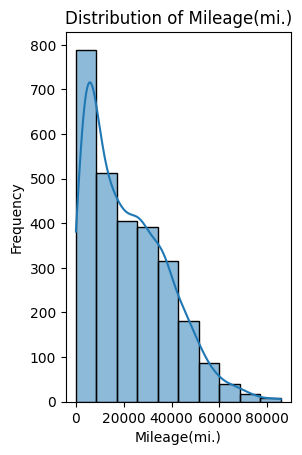

In [17]:
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Mileage(mi.)', bins=10, kde=True)
plt.xlabel('Mileage(mi.)')
plt.ylabel('Frequency')
plt.title('Distribution of Mileage(mi.)')

Text(0.5, 1.0, 'Distribution of Price($)')

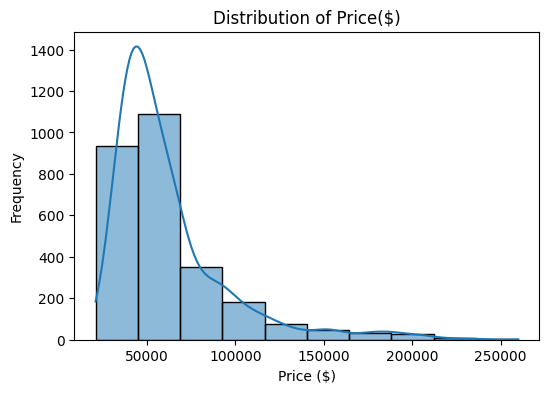

In [18]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Price($)', bins=10, kde=True)
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Price($)')

### Bivariate Analysis

C:\Users\pranj\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


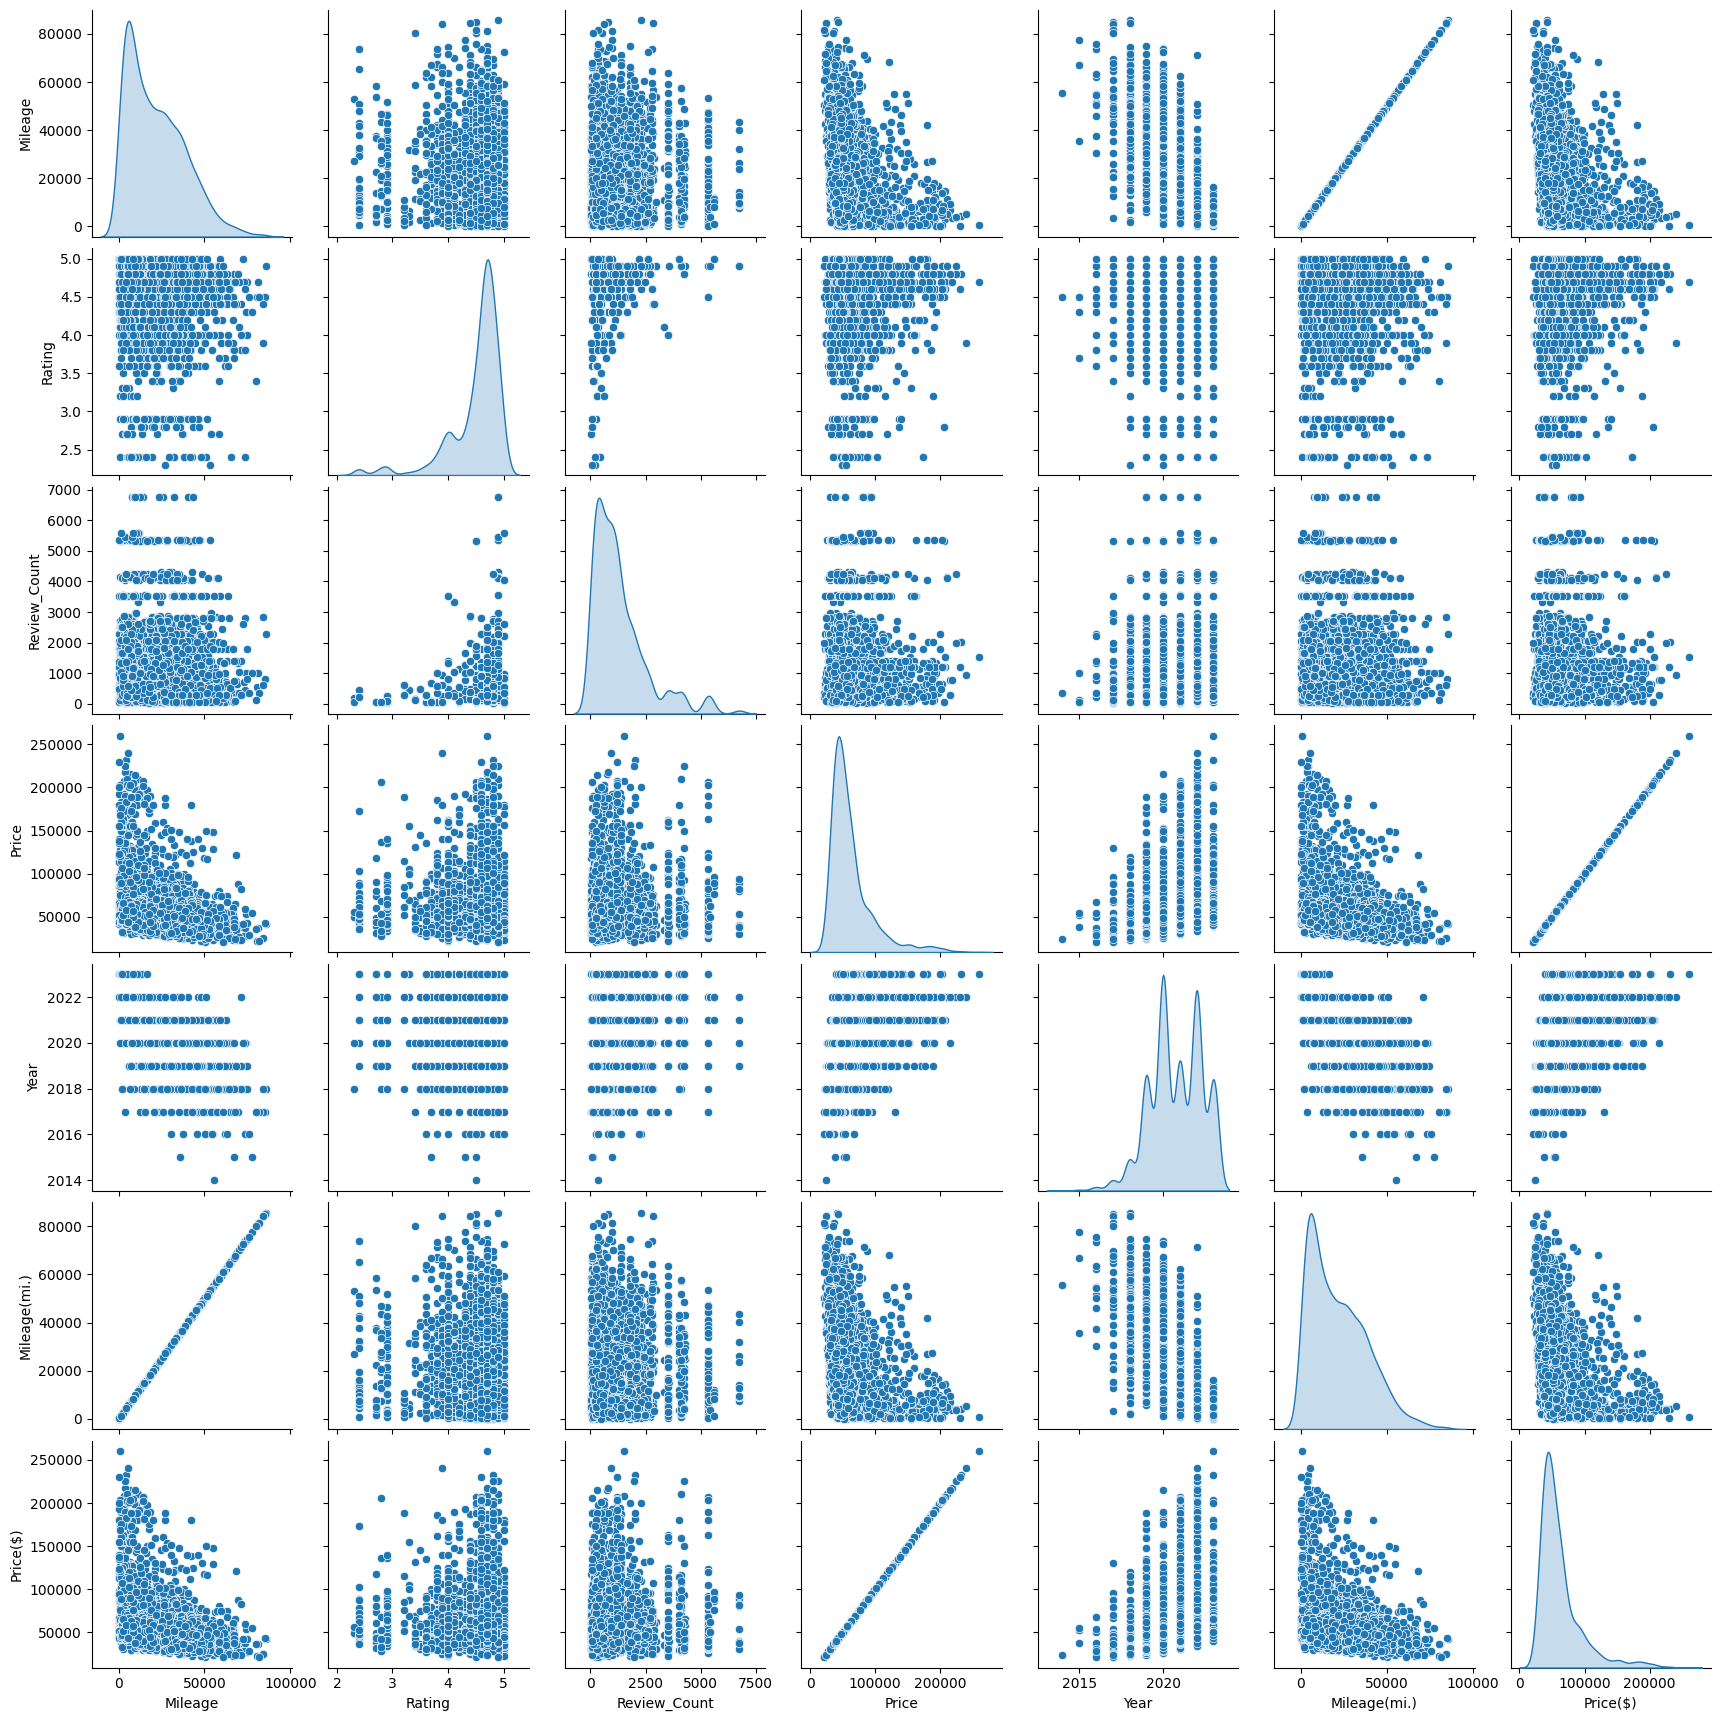

In [19]:
sns.pairplot(df,diag_kind="kde")

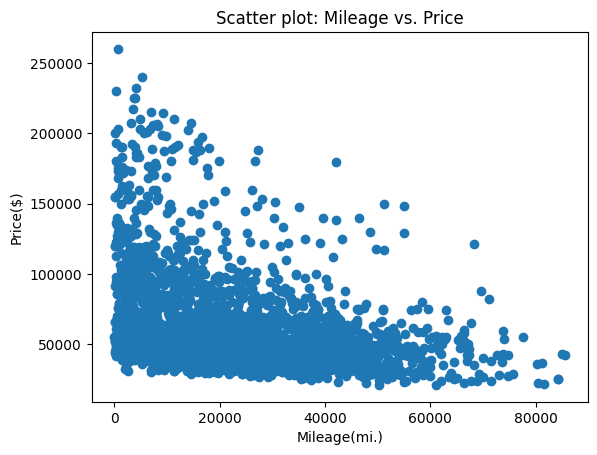

In [20]:
# Scatter plot: Mileage vs. Price
plt.scatter(df['Mileage(mi.)'], df['Price($)'])
plt.xlabel('Mileage(mi.)')
plt.ylabel('Price($)')
plt.title('Scatter plot: Mileage vs. Price')
plt.show()

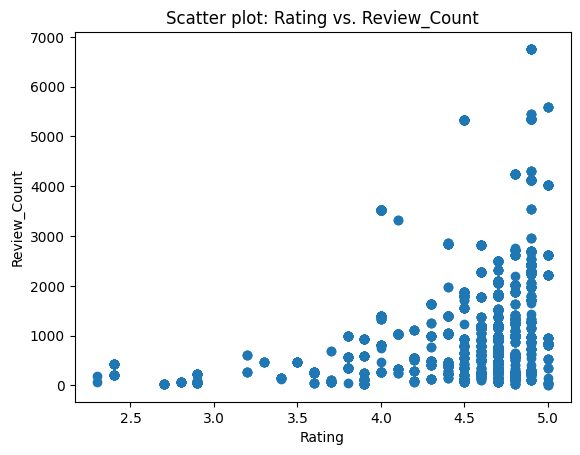

In [21]:
# Scatter plot: Rating vs. Review_Count
plt.scatter(df['Rating'], df['Review_Count'])
plt.xlabel('Rating')
plt.ylabel('Review_Count')
plt.title('Scatter plot: Rating vs. Review_Count')
plt.show()

In [22]:
col=['Year', 'Price', 'Mileage']

In [23]:
corr_ = df[col].corr()

<Axes: >

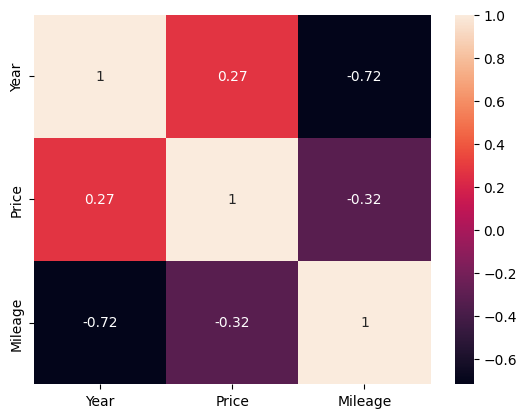

In [24]:
sns.heatmap(corr_, annot=True)

### INSIGTS

In [25]:

# Top 5 most expensive cars
expensive_cars = df.nlargest(5, 'Price($)')
print("Top 5 Most Expensive Cars:")
print(expensive_cars[['Name', 'Price($)']])


Top 5 Most Expensive Cars:
                                              Name  Price($)
163   2023 Mercedes-Benz Maybach S 680 Base 4MATIC  259999.0
338        2022 Mercedes-Benz Maybach S 580 4MATIC  240000.0
184             2023 Mercedes-Benz AMG G 63 4MATIC  231883.0
1687            2022 Mercedes-Benz AMG G 63 4MATIC  229999.0
368             2022 Mercedes-Benz AMG G 63 4MATIC  224995.0


In [29]:
# 5 most rated cars
rated_cars = df.nlargest(5, 'Review_Count')
print("\n5 Most Rated Cars:")
print(rated_cars[['Variant', 'Rating', 'Review_Count']])


5 Most Rated Cars:
                   Variant  Rating  Review_Count
745          S-Class S 560     4.9          6757
757        AMG GLE 53 Base     4.9          6757
1221   GLS 580 Base 4MATIC     4.9          6757
1225  S-Class S 500 4MATIC     4.9          6757
1608        GLS 450 4MATIC     4.9          6757


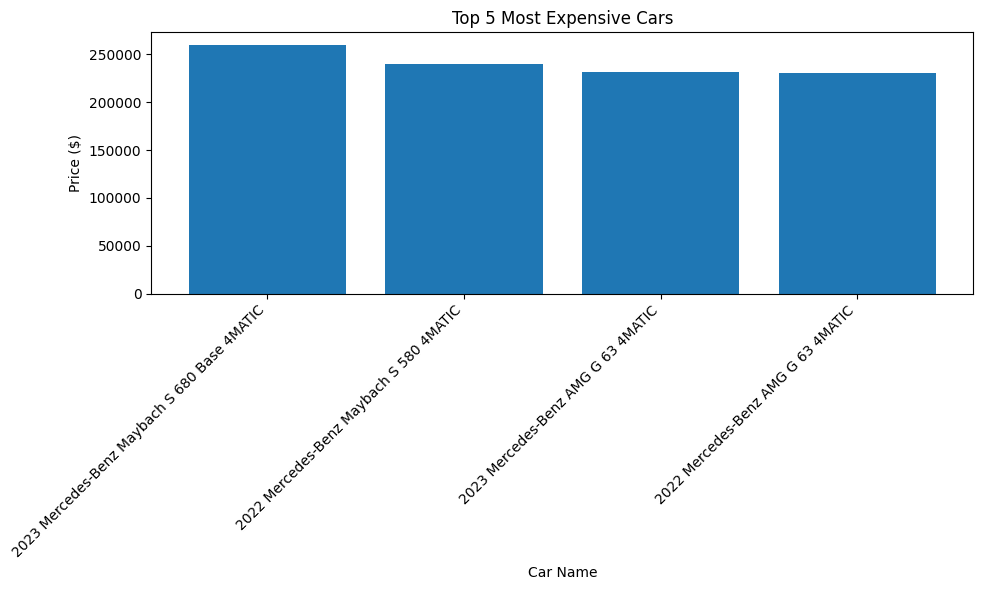

In [36]:
car_names = expensive_cars['Name']
prices = expensive_cars['Price($)']
plt.figure(figsize=(10, 6))
plt.bar(car_names, prices)
plt.xlabel('Car Name')
plt.ylabel('Price ($)')
plt.title('Top 5 Most Expensive Cars')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


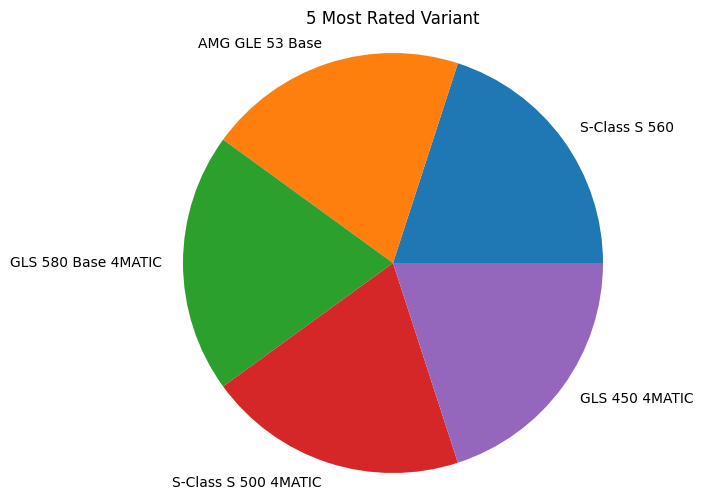

In [34]:
car_names = rated_cars['Variant']
review_counts = rated_cars['Review_Count']

plt.figure(figsize=(8, 6))
plt.pie(review_counts, labels=car_names)
plt.title('5 Most Rated Variant')
plt.axis('equal')
plt.show()



5 Most Rated Cars:
                   Variant  Rating  Review_Count
745          S-Class S 560     4.9          6757
757        AMG GLE 53 Base     4.9          6757
1221   GLS 580 Base 4MATIC     4.9          6757
1225  S-Class S 500 4MATIC     4.9          6757
1608        GLS 450 4MATIC     4.9          6757


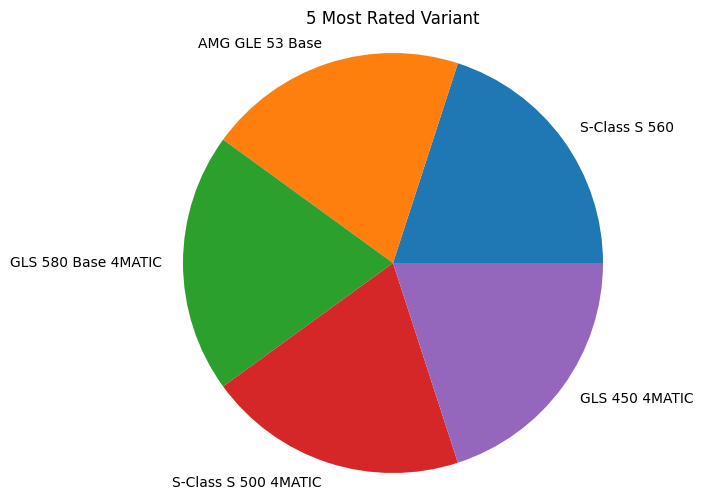

In [33]:
import matplotlib.pyplot as plt

# 5 most rated cars
rated_cars = df.nlargest(5, 'Review_Count')
print("\n5 Most Rated Cars:")
print(rated_cars[['Variant', 'Rating', 'Review_Count']])

car_names = rated_cars['Variant']
review_counts = rated_cars['Review_Count']

plt.figure(figsize=(8, 6))
plt.pie(review_counts, labels=car_names)
plt.title('5 Most Rated Variant')
plt.axis('equal')
plt.show()



5 Most Rated Cars:
                   Variant  Rating  Review_Count  Year
745          S-Class S 560     4.9          6757  2019
757        AMG GLE 53 Base     4.9          6757  2021
1221   GLS 580 Base 4MATIC     4.9          6757  2020
1225  S-Class S 500 4MATIC     4.9          6757  2022
1608        GLS 450 4MATIC     4.9          6757  2022


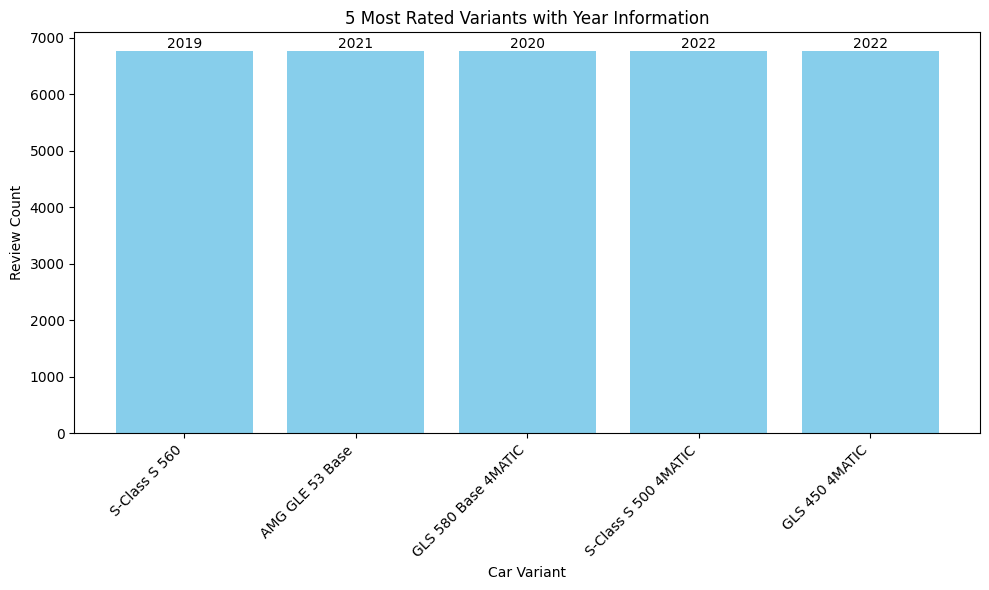

In [32]:
import matplotlib.pyplot as plt

# 5 most rated cars
rated_cars = df.nlargest(5, 'Review_Count')
print("\n5 Most Rated Cars:")
print(rated_cars[['Variant', 'Rating', 'Review_Count', 'Year']])

car_names = rated_cars['Variant']
ratings = rated_cars['Rating']
review_counts = rated_cars['Review_Count']
years = rated_cars['Year']

plt.figure(figsize=(10, 6))

# Plotting bar chart for Review_Count
plt.bar(car_names, review_counts, color='skyblue')

# Annotating the Year on each bar
for i in range(len(years)):
    plt.annotate(years.iloc[i], xy=(i, review_counts.iloc[i]), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Car Variant')
plt.ylabel('Review Count')
plt.title('5 Most Rated Variants with Year Information')
plt.tight_layout()
plt.show()


<div style="background-color: black; padding: 10px;">
<span style="font-size: 20px; font-weight: bold; color: white;">Outlier Analysis</span>
</div>

In [15]:
n=['Mileage','Review_Count','Price']

In [16]:
for i in n:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    ul = q3 + 1.5*iqr
    ll = q1 - 1.5*iqr

    df = df[(df[i] <= ul) & (df[i] >= ll)]

In [17]:
df.shape

(2363, 7)

In [18]:
df.reset_index(drop=True, inplace=True)

<div style="background-color: black; padding: 10px;">
<span style="font-size: 20px; font-weight: bold; color: white;">LinearRegression</span>
</div>

In [19]:
# # One-Hot Encoding
# encoder = OneHotEncoder(drop='first', sparse=False)
# df_encoded = pd.get_dummies(df, columns=['Dealer_Name', 'Variant'], drop_first=True)

In [20]:
# # Standard Scaling
# scaler = StandardScaler()
# df_encoded[['Mileage', 'Rating', 'Review_Count', 'Year']] = scaler.fit_transform(df_encoded[['Mileage', 'Rating', 'Review_Count', 'Year']])


In [21]:
# # Label Encoding
# label_encoder = LabelEncoder()
# df_encoded['Year'] = label_encoder.fit_transform(df_encoded['Year'])


In [22]:
# # Split the data into features (X) and target variable (y)
# X = df_encoded.drop('Price', axis=1)
# y = df_encoded['Price']

In [23]:
# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [24]:
# # Build the linear regression model
# linear_reg = LinearRegression()
# linear_reg.fit(X_train, y_train)

In [25]:
# # Make predictions on the test set
# y_pred = linear_reg.predict(X_test)

In [26]:
# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

In [27]:
# print("Mean Squared Error:", mse)
# print("Mean Absolute Error:", mae)
# print("R^2 Score:", r2)


In [30]:
df.columns

Index(['Mileage', 'Dealer_Name', 'Rating', 'Review_Count', 'Price', 'Year',
       'Variant'],
      dtype='object')

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Mileage', 'Rating', 'Review_Count']),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), ['Dealer_Name', 'Variant']),
        ('label', OrdinalEncoder(), ['Year'])
    ])

# Create the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split the data into features (X) and target variable (y)
X = df[['Mileage', 'Dealer_Name', 'Rating', 'Review_Count', 'Year', 'Variant']]
y = df['Price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)


Mean Squared Error: 62535133.40246531
Mean Absolute Error: 4289.070074865878
R^2 Score: 0.8264676292581504


C:\Users\pranj\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Mileage', 'Rating', 'Review_Count']),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), ['Dealer_Name', 'Variant']),
        ('label', OrdinalEncoder(), ['Year'])
    ])

# Create the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split the data into features (X) and target variable (y)
X = df[['Mileage', 'Dealer_Name', 'Rating', 'Review_Count', 'Year', 'Variant']]
y = df['Price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)


Mean Squared Error: 62535133.40246531
Mean Absolute Error: 4289.070074865878
R^2 Score: 0.8264676292581504


C:\Users\pranj\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [24]:
df

,Mileage,Dealer_Name,Rating,Review_Count,Price,Year,Variant
0,4930.0,Mercedes-Benz of Foothill Ranch,4.7,669,47999.0,2022,EQB 350 Base 4MATIC
1,59985.0,Loeber Motors Inc.,4.2,542,26998.0,2018,GLC 300
2,15899.0,Mercedes-Benz of Catonsville,4.3,494,39600.0,2022,GLB 250 Base 4MATIC
3,22815.0,Mercedes-Benz of Chantilly,4.7,976,48500.0,2022,AMG GLB 35 Base
4,24599.0,Mercedes-Benz of Rochester,4.7,153,68995.0,2021,GLS 450 4MATIC
...,...,...,...,...,...,...,...
2358,7754.0,Mercedes-Benz of Union,4.6,920,55995.0,2020,GLE 350 Base 4MATIC
2359,4441.0,Aristocrat Motors,4.7,1375,57977.0,2022,AMG GLA 35 Base
2360,36682.0,Mercedes-Benz of Nanuet,4.7,268,48192.0,2020,GLE 350 Base 4MATIC
2361,27202.0,Mercedes-Benz of Jacksonville,4.5,84,39991.0,2021,GLC 300 Base 4MATIC


In [23]:
import pickle

pickle.dump(pipeline, open("LinearRegression.pkl", 'wb'))


In [22]:
df.dtypes

Mileage         float64
Dealer_Name      object
Rating          float64
Review_Count      int64
Price           float64
Year             object
Variant          object
dtype: object

In [23]:
df.isnull().sum()

Mileage         0
Dealer_Name     0
Rating          0
Review_Count    0
Price           0
Year            0
Variant         0
dtype: int64

In [23]:
df.sample()

,Mileage,Dealer_Name,Rating,Review_Count,Price,Year,Variant
890,13621.0,Mercedes-Benz of West Houston,4.7,73,59492.0,2020,AMG C 43 Base 4MATIC


In [21]:
# Define the pipeline
pipeline = Pipeline([
    ('preprocessing', ColumnTransformer([
        ('numeric', StandardScaler(), ['Mileage', 'Rating', 'Review_Count', 'Year']),
        ('categorical', OneHotEncoder(drop='first', handle_unknown='ignore'), ['Dealer_Name', 'Variant'])
    ])),
    ('regression', LinearRegression())
])

X = df[['Mileage', 'Dealer_Name', 'Rating', 'Review_Count', 'Year', 'Variant']]
y = df['Price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

# Fit the pipeline on the original training data
pipeline.fit(X, y)

# Prepare the new data as a DataFrame
df_new = pd.DataFrame([[13621.0, "Mercedes-Benz of West Houston", 4.7, 73, 2020, "AMG C 43 Base 4MATIC"]],
                        columns=["Mileage", "Dealer_Name", "Rating", "Review_Count", "Year", "Variant"])

# Make predictions on the new data
predictions = pipeline.predict(df_new)

# Print the predictions
print(predictions)


[52630.02538606]


In [29]:
# Define the column transformer
preprocessor = ColumnTransformer([
    ('numeric', StandardScaler(), ['Mileage', 'Rating', 'Review_Count', 'Year']),
    ('categorical', OneHotEncoder(drop='first', handle_unknown='ignore'), ['Dealer_Name', 'Variant'])
])

# Create the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the pipeline on the entire data
X = df[['Mileage', 'Dealer_Name', 'Rating', 'Review_Count', 'Year', 'Variant']]
y = df['Price']
pipeline.fit(X, y)

# Save the trained model to a file
pickle.dump(pipeline, open("linear_regression_model.pkl", "wb"))
